In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt

# Q1

A)

we set goal state reward to +1 and the value of every non-goal state is set to zero.

the value of s_n is equal to :


\begin{array}{l}
V({s_{n-1}}) = R({s_{n-1}}) + \gamma .(goal\_value)\\
\end{array}

and the value of goal state equals to :

(agent will stay in goal state after reaching it, so the next state will be the goal state again)

\begin{array}{l}
V(G) = R(G) + \gamma .(V(G))\\
V(G) - \gamma .(V(G)) = R(G)\\
(1 - \gamma )V(G) = R(G)\\
V(G) = \frac{{R(G)}}{{1 - \gamma }} = \frac{1}{{1 - \gamma }}
\end{array}

bacause the optimal action at each state is a_0(right) so the optimal value for s_n-1  is:

\begin{array}{l}
V({s_{n-1}}) = R({s_{n-1}}) + \gamma .V(G)\\
V({s_{n-1}}\,) = 0 + \gamma .\frac{1}{{1 - \gamma }} = \frac{\gamma }{{1 - \gamma }}
\end{array}

so for the rest of the states we have :

\begin{array}{l}
V({s_{n - 2}}) = \frac{{{\gamma ^2}}}{{1 - \gamma }}\\
V({s_{n - 3}}) = \frac{{{\gamma ^3}}}{{1 - \gamma }}\\
.\\
.\\
.\\
V({s_{1}}) = \frac{{{\gamma ^{n-1}}}}{{1 - \gamma }}
\end{array}


B)

Discount factors are important in inﬁnite-horizon MDPs, in which they determine how the reward
is counted.

The discount factor affects how much weight it gives to future rewards in the value function.
A discount factor gamma=0 will result in state/action values representing the immediate reward(explore), while a higher discount factor gamma=0.9 will result in the values representing the cumulative discounted future reward an agent expects to receive (behaving under a given policy or exploit).The convergence is influenced by the discount factor depending on whether it’s a continual task or an episodic one. In a continual one,  must be between [0,1), whereas an episodic one it can be between [0,1].If gamma > 0, value of gamma does not change the ordering of states, so the optimal policy is the same; however, the value of the value function depends on discount factor. If gamma = 0 then, policy ∀s : π(s) = a_0 is still an optimal policy; however, this is not the only optimal policy. 

therefore, the choice of discout factor will affect the policy that results.


C)

it has no effect on the optimal policy.Adding a constant c to all the rewards only changes the value of each state for any policy:

\begin{array}{l}
{V_{new}}(G) = R(G) + c + \gamma {V_{new}}(G)\\
(1 - \gamma ){V_{new}}(G) = 1 + c\\
{V_{new}}(G) = \frac{{1 + c}}{{1 - \gamma }} = \frac{1}{{1 - \gamma }} + \frac{c}{{1 - \gamma }} = {V_{old}}(G) + \frac{c}{{1 - \gamma }}
\end{array}

so for every other states we have :

\begin{array}{l}
{V_{new}}({s_t}) = {V_{old}}({s_t}) + \frac{c}{{1 - \gamma }}\\
\end{array}


D)

for goal state we have:

\begin{array}{l}
{V_{new}}(G) = \beta (\alpha  + R(G)) + \gamma {V_{new}}(G)\\
(1 - \gamma ){V_{new}}(G) = \beta (\alpha  + 1)\\
{V_{new}}(G) = \frac{{\beta (\alpha  + 1)}}{{1 - \gamma }} = \frac{{\beta \alpha }}{{1 - \gamma }} + \frac{{\beta .1}}{{1 - \gamma }} = \beta .{V_{old}}(G) + \frac{{\beta \alpha }}{{1 - \gamma }}
\end{array}

and for other states :

\begin{array}{l}
{V_{new}}({s_t}) = \beta .{V_{old}}({s_t}) + \frac{{\beta \alpha }}{{1 - \gamma }}\\
\end{array}

So if 
\begin{array}{l} 
\beta  > 0
\end{array}

then the optimal policy will not change, and the value of the new optimal policy is a linear mapping of the previous optimal value function.

if 
\begin{array}{l}
\beta  = 0
\end{array}
then all states have reward 0 and any policy is the optimal policy, and the optimal value of all states is 0.

if 

\begin{array}{l}
\beta  < 0
\end{array}

any policy that never reaches to the state G is the optimal policy, because in this case goal state has least value than other states.


# implementation

In [2]:
# making visual environment of mountain car 
# mountain car has a fully deterministic environment
env = gym.make('MountainCar-v0')
# initialize the position and velocity of the agent(car)
# first element = position
# second element = velocity
# position is in range (-1.2,0.6)
# velocity is in range (-0.07,0.07)
env.reset()

array([-0.50647686,  0.        ])

## Q learning formula

update Q-value of every pair of state and action in deteministic environment with :

\begin{array}{l}
{Q^{new}}({s_t},{a_t}) \leftarrow {r_t} + \gamma .\mathop {\max }\limits_a Q({s_{t + 1}},a)\\
\end{array}

and in non-deterministic environment with :

\begin{array}{l}
{Q^{new}}({s_t},{a_t}) \leftarrow (1 - \alpha )Q({s_t},{a_t}) + \alpha .({r_t} + \gamma .\mathop {\max }\limits_a Q({s_{t + 1}},a))\\
\end{array}


where alpha is the learning rate.

In [3]:
# Determine size of discretized state space
#devide position values into 19 discrete value (-1.2, -1.1, ..., 0.6) [19 values]
#decvide velocity values into 15 discrete value (-0.07, -0.06, ..., 0.07) [15 value]
discrete_space= [19, 15]
# calculate steps in discretized space 
discrete_space_step = (env.observation_space.high - env.observation_space.low)/discrete_space

In [4]:
#initialize constants
discount_factor = 0.9
episodes = 3000

In [5]:
# Initialize Q table with zero values
# rows and columns presenting the discretized position and velocity and corresponding value to 
# each position and velocity represent a vector with 3 values which are Q-values for 3 actions
# action space = {0: move left , 1: stay , 2: move right}
# we also can initialize Q-values with random numbers of uniform distribution, like :
# q_table = np.random.uniform(low = -1, high = 1, size=(discrete_space+[env.action_space.n]))

q_table = np.zeros((discrete_space+[env.action_space.n]))

In [6]:
# turn every pair of state ( (position , velocity) ) into a discretized pair of state in shape of tuple
def get_discrete_state(state):
    discrete_state = (state - env.observation_space.low)/discrete_space_step
    return tuple(discrete_state.astype(np.int))

In [7]:
# all the rewards collected in every episode
# car recieve a reward equal to -1 for every action
# car has 200 points at first of each episode , 
# so if it doesn't reach the goal before this 200 points finishes, episode will be ended.
# (200 actions without reaching goal)
episode_rewards = []

In [8]:
for episode in range(episodes):
    # car has no reward at the start of an episode
    episode_reward = 0
    # start 
    # get discreted values for starting state
    discrete_state = get_discrete_state(env.reset())
    # check whether agent reached the goal or not
    # done = True ---> agent hasn't reached the goal yet
    # done = False ---> agent reached the goal
    done = False
    # do the rest till agent hasn't reached the goal
    while not done:
        # get action from Q table
        # choose maximum value action
        action = np.argmax(q_table[discrete_state])
        # take an action 
        new_state, reward, done, info = env.step(action)
        # take the rewards 
        episode_reward += reward
        # discretized new state 
        new_discrete_state = get_discrete_state(new_state)
        # we need to run many thousands of iterations, and rendering the environment will cause it to take far longer.
        # so we can check out the environment every 100 steps
        if episode % 100 == 0:
            # renders one frame of the environment (helpful in visualizing the environment)
            env.render()
            
        # update Q values
        if not done:
            max_q = np.max(q_table[new_discrete_state])
            #current_q = q_table[discrete_state + (action,)]
            #new_q = (1 - learning_rate) * current_q + learning_rate * (reward + discount_factor * max_future_q)
            new_q = reward + discount_factor * max_q
            q_table[discrete_state + (action,)] = new_q
        
        # if agent reaches the goal
        elif new_state[0] >= env.goal_position:
            # give agent the maximum reward
            q_table[discrete_state + (action,)] = 1
        # go to next step
        discrete_state = new_discrete_state
        
    episode_rewards.append(episode_reward)
        

env.close()

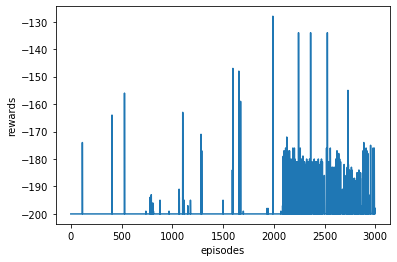

In [9]:
# present rewards in every episode
plt.plot(range(episodes),episode_rewards)
plt.xlabel('episodes')
plt.ylabel('rewards')
plt.show()

after updating Q-table and after reaching goal, to let agent explore the environment and learn how to reach the goal in different ways, we define a constant (epsilon) to let agent choose random actions in every step instead of using on policy.

In [10]:
# use epsilon for exploring instead of exploiting after reaching goal for once  
epsilon=0.1
episode_rewards2 = []
env.reset()

array([-0.50079553,  0.        ])

In [11]:
# repeat the last algorithm
for episode in range(episodes):
    episode_reward = 0
    discrete_state = get_discrete_state(env.reset())
    done = False
    while not done:
        if np.random.uniform(0,1) < epsilon:
            # explore action space
            # choose a random action
            action=env.action_space.sample()
        else:
            action = np.argmax(q_table[discrete_state])
        new_state, reward, done, info = env.step(action) 
        episode_reward += reward 
        new_discrete_state = get_discrete_state(new_state)
        if episode % 100 == 0:
            env.render()
            
        if not done:
            max_q = np.max(q_table[new_discrete_state])
            #current_q = q_table[discrete_state + (action,)]
            #new_q = (1 - learning_rate) * current_q + learning_rate * (reward + discount_factor * max_future_q)
            new_q = reward + discount_factor * max_q
            q_table[discrete_state + (action,)] = new_q
        elif new_state[0] >= env.goal_position:
            q_table[discrete_state + (action,)] = 1
        discrete_state = new_discrete_state
        
    episode_rewards2.append(episode_reward)
        

env.close()

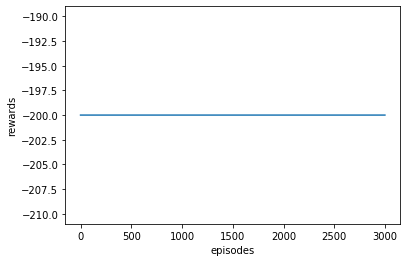

In [12]:
plt.plot(range(episodes),episode_rewards2)
plt.xlabel('episodes')
plt.ylabel('rewards')
plt.show()

Additionally we can initialize Q-table with random numbers of uniform distribution (Create a custom reward to speed up convergence of the Q-learning)

In [13]:
q_table2 = np.random.uniform(low = -1, high = 1, size=(discrete_space+[env.action_space.n]))

In [14]:
episode_rewards3 = []
env.reset()
learning_rate=0.1
# learning rate is the extent to which our Q-values are being updated in every iteration

In [15]:
# repeat the last algorithm
for episode in range(episodes):
    episode_reward = 0
    discrete_state = get_discrete_state(env.reset())
    done = False
    while not done:
        if np.random.uniform(0,1) < epsilon:
            action=env.action_space.sample()
        else:
            action = np.argmax(q_table2[discrete_state])
        new_state, reward, done, info = env.step(action) 
        episode_reward += reward 
        new_discrete_state = get_discrete_state(new_state)
        if episode % 100 == 0:
            env.render()
            
        if not done:
            max_q = np.max(q_table2[new_discrete_state])
            current_q = q_table[discrete_state + (action,)]
            new_q = (1 - learning_rate) * current_q + learning_rate * (reward + discount_factor * max_q)
            #new_q = reward + discount_factor * max_q
            q_table2[discrete_state + (action,)] = new_q
        elif new_state[0] >= env.goal_position:
            q_table2[discrete_state + (action,)] = 1
        discrete_state = new_discrete_state
        
    episode_rewards3.append(episode_reward)
        

env.close()

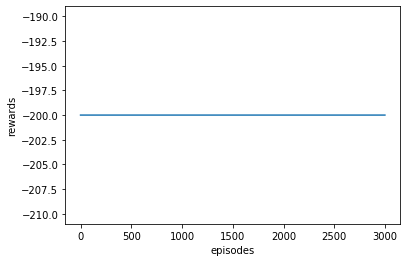

In [16]:
plt.plot(range(episodes),episode_rewards3)
plt.xlabel('episodes')
plt.ylabel('rewards')
plt.show()